<a href="https://colab.research.google.com/github/Jung0Jin/Python_Machine_Learning/blob/master/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B5%90%EA%B3%BC%EC%84%9C3%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3장 사이킷런을 타고 떠나는 머신 러닝 분류 모델 투어

강력하고 인기 있는 분류 알고리즘 : 로지스틱 회귀, 서포트 벡터 머신, 결정 트리

예제와 설명을 위해 사이킷런 머신 러닝 라이브러리 사용하기

선형 또는 비선형 결정 경계를 갖는 분류 알고리즘의 강점과 약점 설명하기

##3.1 분류 알고리즘 선택

모든 경우에 뛰어난 성능을 낼 수 있는 분류 모델은 없다.

몇 개의 학습 알고리즘 성능을 비교하고 해당 문제에 최선인 모델을 선택하는 것이 권장된다.

머신 러닝 알고리즘을 훈련하기 위한 다섯 가지 단계 :

1. 특성을 선택하고 훈련 샘플을 모은다.

2. 성능 지표를 선택한다.

3. 분류 모델과 최적화 알고리즘을 선택한다.

4. 모델의 성능을 평가한다.

5. 알고리즘을 튜닝한다.

## 3.2 사이킷런 첫걸음 : 퍼셉트론 훈련

In [0]:
from sklearn import datasets
import numpy as np

In [0]:
iris = datasets.load_iris()

In [3]:
iris.data[:5] # iris.data 의 샘플을 5개 정도 봐보자

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
X = iris.data[:, [2,3]] # 데이터를 다 가져오는데, 3번째, 4번째 특성만 가져온다.
y = iris.target
print('클래스 레이블:', np.unique(y)) # unique(y) 는 iris.target에 있는 고유한 값을 리턴한다.

클래스 레이블: [0 1 2]


클래스 레이블을 정수 레이블로 권장되는 이유 :

1. 사소한 실수를 피할 수 있다.

2. 작은 메모리 영역을 차지하여 계산 성능을 향상시킨다.

3. 정수로 인코딩하는 것이 공동퇸 관례다.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state = 1, stratify = y
)

30%는 테스트 데이터 (45개의 샘플)
70%는 훈련 데이터 (105개의 샘플)

train_test_split 함수가 분할하기 전 데이터 셋을 섞는다.
그렇지 않으면 클래스 0과 클래스 1은 훈련 세트에 들어가고
클래스 2는 테스트 세트에 들어간다.

데이터 셋을 섞기 위해 사용되는 유사 난수 생성기에 random_state 매개변수로 고정된 랜덤 시드 (random_state=1)를 전달한다.

stratify = y 를 통해 계층화(stratiftication) 기능을 사용한다. 훈련 세트와 테스트 세트의 클래스 레이블 비율을 동일하게 만든다는 의미다.

In [6]:
print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))
# bincount 함수 : 배열에 있는 고유한 값의 등장 횟수를 나타냄. 계층화가 잘 되었는지 확인할 수 있다.

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train) # fit 메서드는 훈련 세트의 각 특성 차원마다 샘플 평균과 표준편차를 계산한다.
X_train_std = sc.transform(X_train) # transfomr 메서는 계산된 평균과 표준편차로 훈련 세트를 표준화한다.
X_test_std = sc.transform(X_test) # 훈련 세트와 테스트 세트의 샘플이 서로 같은 비율로 이동되도록 동일한 평균과 표준편차로 표준화한다.

In [8]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter = 40, eta0 = 0.1, tol = 1e-3, random_state=1) # max_iter : 에포크 횟수, eta0 : 학습률
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
y_pred = ppn.predict(X_test_std)
print(f'잘못 분류된 샘플 개수 : {(y_test != y_pred).sum()}')

잘못 분류된 샘플 개수 : 1


퍼셉트론 모델이 45개의 샘플에서 1개를 잘못 분류한다.

테스트 세트에 대한 분류 오차는 (1/45) 이고, 정확도는 (1-오차) = 1-(1/45) 이다.

In [10]:
from sklearn.metrics import accuracy_score
print(f'정확도 : {accuracy_score(y_test, y_pred)}')
print(f'정확도 : {ppn.score(X_test_std, y_test)}') # 두 코드가 같은 의미이다.

정확도 : 0.9777777777777777
정확도 : 0.9777777777777777


In [0]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [0]:
def plot_decision_regions(X, y, classifier, test_idx = None,
                          resolution=0.02):
  
  # 마커와 컬러맵 설정
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # 결정 경계 그리기
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # ravel은 데이터를 1차원으로 변환시킨다.
  Z = Z.reshape(xx1.shape) # 보통 이 책에서는ravel과 reshape를 같이 쓰는 듯
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                alpha=0.8, c=colors[idx],
                marker = markers[idx], label=cl,
                edgecolor = 'black')
    
    # 테스트 샘플을 부각하여 그린다.
  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]

    plt.scatter(X_test[:, 0], X_test[:, 1],
                  c='', edgecolor='black', alpha=1.0,
                  linewidth=1, marker='o',
                  s=100, label='test set')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


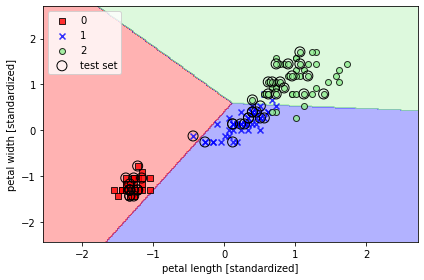

In [13]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined  = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 3.3 로지스틱 회귀를 사용한 클래스 확률 모델링

퍼셉트론 규칙의 단점 : 클래스가 선형적으로 구분되지 않을 때 수렴할 수 없다.

로지스틱 회귀를 배워보자.

### 3.3.1 로지스틱 회귀의 이해와 조건부 확률

In [0]:
import matplotlib.pyplot as plt
import numpy as np

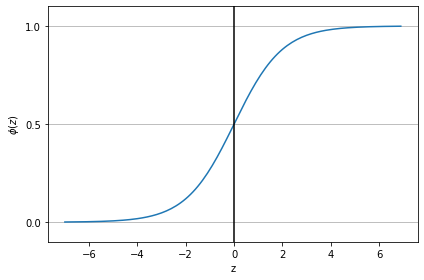

In [15]:
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color ='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0]) # y축의 눈금과 격자선
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

### 3.3.2 로지스틱 비용 함수의 가중치 학습

가능도 함수 $L$을 최대화 해야한다.

가능도 함수에 보통 로그를 적용하는 데 그 이유는 다음과 같다.

1. 로그 함수를 적용하면 가능도가 매우 작을 때 일어나는 수치상의 언더플로(underflow)를 미연에 방지한다.

2. 계수의 곱을 계수의 합으로 바꾼다. 이러면 미분이 쉬워진다.

In [0]:
def cost_1(z):
  return -np.log(sigmoid(z))

def cost_0(z):
  return -np.log(1-sigmoid(z))

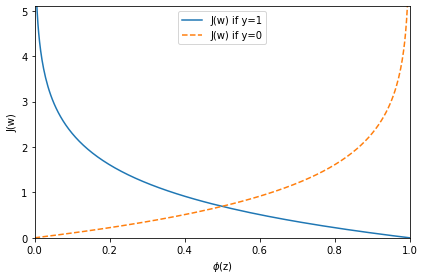

In [17]:
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z) # -10에서 10 까지 범우의 값을 시그모이드 함수에 넣는다.

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')


plt.xlim([0,1]) # 0에서 1까지 범위의 시그모이드 활성화 값
plt.ylim(0.0, 5.1) # 시그모이드 활성화 값에 해당하는 로지스틱 비용
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### 3.3.3 아달린 구현을 로지스틱 회귀 알고리즘으로 변경

In [0]:
class LogisticRegressionGD(object):
  """경사 하강법을 사용한 로지스틱 회귀 분류기

  매개변수
  ----------
  eta : float
    학습률 (0과 1 사이)
  n_iter : int
    훈련 데이터셋 반복 횟수
  random_state : int
    가중치 무작위 초기화를 위한 난수 생성기 시드

  속성
  ----------
  w_ : 1d-array
    학습된 가중치
  cost_ : list
    에포크마다 누적된 로지스틱 비용 함수 값

  """
  def __init__(self, eta=0.05, n_iter=100, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """훈련 데이터 학습

    매개변수
    ----------
    X : {array-like}, shape = [n_samples, n_features]
      n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
    y : array-like, shape = [n_samples]
      타깃 값
      
    반환값
    ----------
    self : object

    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0 ,scale=0.01,
                          size=1 + X.shape[1]) # 가장 처음 가중치를 랜덤으로 잡는다.
    self.cost_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors) # 가중치 1에서 m까지
      self.w_[0] += self.eta * errors.sum() # 절편

      # 아달린에서는 cost = (errors**2).sum() / 2.0 : 오차 제곱합 이지만, 대신 로지스틱 비용을 계산한다.
      cost = (-y.dot(np.log(output)) -
              ((1 - y).dot(np.log(1 - output))))
      self.cost_.append(cost)
    return self

  def net_input(self, X):
    """최종 입력 계산"""
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, z):
    """로지스틱 시그모이드 활성화 계산"""
    return 1.0 / (1.0 + np.exp(-np.clip(z, -250, 250)))
  
  def predict(self, X):
    """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
    return np.where(self.net_input(X) >= 0.0, 1, 0)
    # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0) 와 동일한 코드

로지스틱 모델은 이준 분류 문제에만 적용할 수 있다.

Iris-setosa와 Iris-versicolor로 작동하는지 확인하자.

In [0]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta=0.05,
                            n_iter=1000,
                            random_state=1)

In [20]:
lrgd.fit(X_train_01_subset, y_train_01_subset)

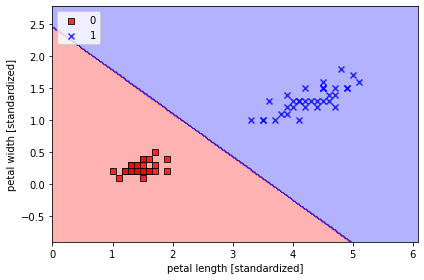

In [21]:
plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc ='upper left')
plt.tight_layout()
plt.show()

### 3.3.4 사이킷런을 사용하여 로지스틱 회귀 모델 훈련

In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='auto',
                        C=100.0, random_state=1) # C는 과대적합과 규제 개념을 소개하면서 설명하겠다.

In [23]:
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


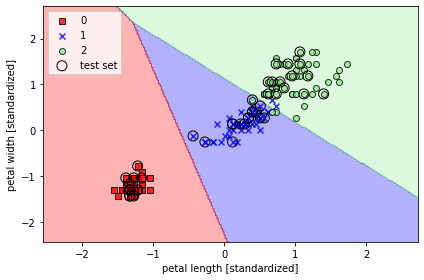

In [24]:
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=lr,
                      test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc ='upper left')
plt.tight_layout()
plt.show()

In [25]:
lr.predict_proba(X_test_std[:3, :])

array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01],
       [8.33962295e-01, 1.66037705e-01, 4.55557009e-12],
       [8.48762934e-01, 1.51237066e-01, 4.63166788e-13]])

첫 번째 행은 첫 번째 꽃의 클래스 소속 확률

두 번째 행은 두 번째 꽃의 클래스 소속 확률

당연하지만 열을 모두 더하면 (행의 원소를 더하면) 1이 된다.

In [26]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

첫 번째 행에서 가장 큰 값은 대략 0.85이다.

그 의미는 첫 번째 샘플이 클래스 3에 속할 확률이 85%라는 것이다.

행에서 가장 큰 값의 열이 예측 클래스 레이블이 된다. 코드로 보면 아래와 같다.

In [27]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [28]:
# 위 코드는 조건부 확률로부터 얻은 클래스 레이블로 수동적인 방법이다. 이 코드는 predict 메서드를 호출하여 빠르게 확인할 수 있다.
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [29]:
# 사이킷런은 입력 데이터로 2차원 배열을 기대한다. 주의하자.
lr.predict(X_test_std[0,:].reshape(1,-1))

array([2])

In [30]:
X_test_std[0,:].reshape(1,-1) # 2차원 배열이다.

array([[0.89820289, 1.44587881]])

In [31]:
X_test_std[0,:] # 1차원 배열이다.

array([0.89820289, 1.44587881])

In [32]:
lr.predict(X_test_std[0,:]) # 2차원 배열이 아닐 때 ValueError가 난다.

ValueError: ignored

### 3.3.5 규제를 사용하여 과대적합 피하기

과대적합(overfitting) : 훈련 데이터로는 잘 동작하지만, 테스트 데이터로는 못 맞추는 현상

과대적합을 모델의 분산이 크다고 말하기도 한다.

과소적합(underfitting) : 훈련 데이터도 잘 못 맞춰서, 데스트 데이터를 못 맞춘다.

과소적합을 모델의 편향이 크다고 말하기도 한다.

overfitting 과 underfitting의 공통점 : 둘 다 테스트 데이터 못 맞춘다.

+ 분산은 모델을 여러 번 훈련했을 때 특정 샘플에 대한 예측의 일관성(또는 변동성)을 측정한다.

예를 들어 훈련 데이터셋의 일부분을 사용하여 여러 번 훈련하는 경우다.

모델이 훈련 데이터의 무작위성에 민감하다고 할 수 있다. (= 훈련 데이터가 바뀔 때마다 모델의 예측이 바뀐다.)

+ 편향은 다른 훈련 데이터셋에서 여러 번 훈련했을 때 예측이 정확한 값에서 얼마나 벗어났는지 측정한다.

편향은 무작위성이 아니라 구조적인 에러를 나타낸다. (= 그냥 못 맞춘거다.)

좋은 편향-분산 트레이드오프를 찾는 한 가지 방법은 규제를 사용하여 모델의 복잡도를 조정하는 것이다.

+ 규제(regularization)는 공선성(collinearity)(특성 간의 높은 상관관계)를 다루거나 데이터에서 잡음을 제거하여 과대적합을 방지할 수 있는 방법이다.

가장 널리 사용하는 규제 형태는 L2 규제이다. (L2 축소, 가중치 감쇠라고 부르기도 한다.)

규제가 잘 동작하려면 모든 특성이 비슷한 스케일을 가져야 한다. 표준화가 중요한 이유중 한 가지이다.

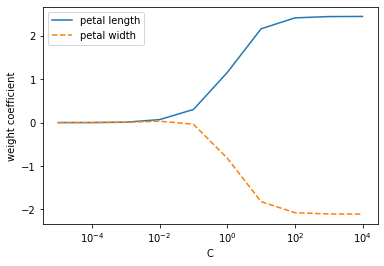

In [33]:
weights, params = [], []
for c in np.arange(-5, 5):
  lr = LogisticRegression(solver='liblinear', multi_class='auto', C=10.**c,
                          random_state=1)
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.xlabel('C')
plt.ylabel('weight coefficient')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

c의 값이 -5, -4, -3, -2, -1,  0,  1,  2,  3,  4 까지 바뀌면서 열 개의 로지스틱 회귀 모델을 훈련한다.

결과 그래프는 매개변수 C가 감소하면 가중치 절댓값이 줄어드는 것을 볼 수 있다. 즉 규제 강도가 증가한다.

##3.4 서포트 벡터 머신을 사용한 최대 마진 분류

퍼셉트론 알고리즘은 분류 오차를 최소화하는 것이 목표다.

서포트 벡터 머신 (Support Vector Machine, SVM)은 마진을 최대화 하는 것이다.

마진이란 클래스를 구분하는 초평면(결정 경계)과 이 초평면에 가장 가까운 훈련 샘플 사이의 거리로 정의한다.

또, 이런 샘플을 서포트 벡터(Support Vector)라고 한다.

###3.4.1 최대 마진

큰 마진의 결정 경계를 원하는 이유는 일반화 오차가 낮아지는 경향이 있기 때문이다.

작은 마진의 모델은 과대적합되기 쉽다.

###3.4.2 슬랙 변수를 사용하여 비선형 분류 문제 다루기

In [0]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)

In [36]:
svm.fit(X_train_std, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


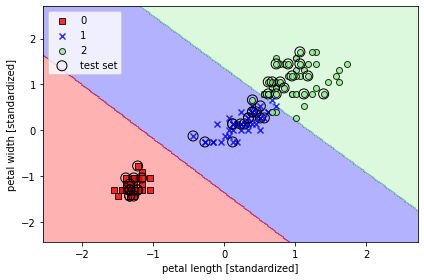

In [37]:
plot_decision_regions(X_combined_std,
y_combined,
classifier=svm,
test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

선형 로지스틱 회귀와 선형 SVM은 비슷한 결과를 만든다.

로지스틱 회귀는 훈련 데이터의 조건부 가능도를 최대화하기 때문에 SVM보다 이상치에 민감하다.

SVM은 결정 경계에 가장 가까운 포인트(서포트 벡터)에 대부분 관심을 둔다.

로지스틱 회귀는 모델이 간단하고 구현하기 쉬운 장점이 있다.

로지스틱 회귀 모델은 업데이트가 용이하므로 스트리밍 데이터를 다룰 때 적합하다.

### 3.4.3 사이킷런의 다른 구현

In [0]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

##3.5 커널 SVM을 사용하여 비선형 문제 풀기

###3.5.1 선형적으로 구분되지 않는 데이터를 위한 커널 방법

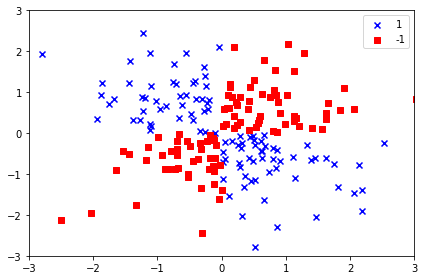

In [43]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:,0]>0,
                       X_xor[:,1]>0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1,0],
            X_xor[y_xor == 1,1],
            c='b', marker = 'x',
            label='1')
plt.scatter(X_xor[y_xor == -1,0],
            X_xor[y_xor == -1,1],
            c='r', marker = 's',
            label='-1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

선형적으로 구분되지 않는 데이터를 다루는 커널 방법(kernel method)의 기본 아이디어는 선형적으로 구분되는 고차원 공간에 투영하는 것이다.

###3.5.2 커널 기법을 사용하여 고차원 공간에서 분할 초평면 찾기

SVM은 비선형 문제를 풀기 위해 매핑 함수를 사용하여 훈련 데이터를 고차원 특성 공간으로 변환한다.

이런 매핑 방식의 문제점은 새로운 특성을 만드는 계싼 비용이 비싸다는 것이다.

높은 비용을 절감하기 위해 커널 함수(kernel function)가 등장한다.

커널 중 하나가 방사 기저 함수(Radial Basis Function, RBF)이다. 같은 의미로 가우시안 커널(Gaussian kernel)이라고도 한다.

커널이란 용어를 샘플 간의 유사도 함수(similarity function)으로 해석할 수 있다.

매우 비슷한 샘플의 유사도 점수는 1

매우 다른 샘플의 유사도 점수는 0이다.

In [0]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)

In [45]:
svm.fit(X_xor, y_xor)

SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

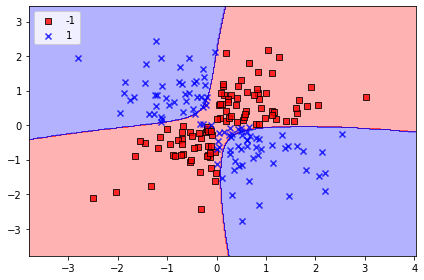

In [46]:
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [47]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


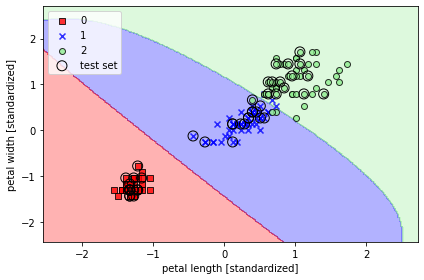

In [48]:
plot_decision_regions(X_combined_std,
y_combined,
classifier=svm,
test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


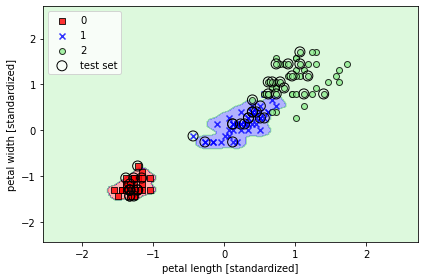

In [49]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
y_combined,
classifier=svm,
test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

##3.6 결정 트리 학습

결정 알고리즘은 정보 이득(Information Gain, IG)이 최대가 되는 특성으로 데이터를 나눈다.

이렇게 하면 노드가 많은 깊은 트리가 만들어지고 과대적합 될 가능성이 높다. 따라서 트리의 최대 깊이를 제한하여 트리를 가지치기(pruning)한다.

### 3.6.1정보 이득 최대화: 자원을 최대로 활용

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def gini(p):
  return (p)*(1 - (p)) + (1 - p) * (1 - (1-p))

In [0]:
def entropy(p):
  return - p*np.log2(p) - (1-p)*np.log2((1-p))

In [0]:
def error(p):
  return 1 - np.max([p, 1-p])

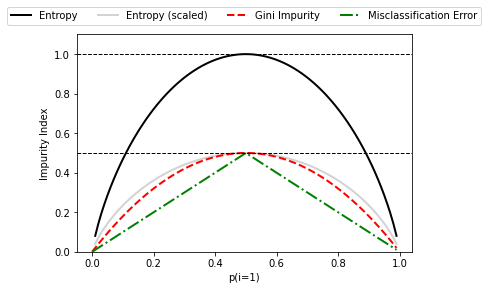

In [56]:
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent,gini(x), err],
                          ['Entropy', 'Entropy (scaled)',
                           'Gini Impurity',
                           'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray',
                          'red', 'green', 'cyan']):
  line = ax.plot(x, i, label=lab,
  linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

###3.6.2 결정 트리 만들기

In [0]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini',
                              max_depth=4,
                              random_state=1)

In [0]:
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


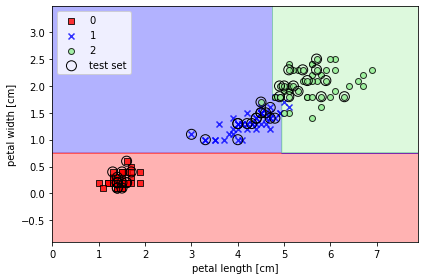

In [59]:
plot_decision_regions(X_combined,
                      y_combined,
                      classifier=tree,
                      test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

사이킷런은 훈련한 후 결정트리르 .dot 파일로 추출할 수 있는 멋진 기능이 있다고 하는데 생략한다.

###3.6.3 랜덤 포레스트로 여러 개의 결정 트리 연결

랜덤 포레스트는 결정 트리의 앙상블(ensemble)이다.

여러 개의 결정 트리를 평균 내는 것이다.

개개의 트리는 분산이 높은 문제가 있지만, 앙상블은 견고한 모델을 만들어 일반화 성능을 높이고 과대적합의 위험을 줄인다.

1. n개의 랜덤한 부트스트랩(bootstrap) 샘플을 뽑는다. (훈련 세트에서 중복을 허용하면서 랜덤하게 n개의 샘플을 선택한다.)

2.부트스트랩 샘플에서 결정 트리를 학습한다. 각 노드에서 다음과 같이 한다.

+ a. 중복을 허용하지 않고 랜덤하게 d개의 특성을 선택한다.

+ b. 정보 이득과 같은 목적 함수를 기준으로 최선의 분할을 만드는 특성을 사용해서 노드를 분할한다.

3. 1,2를 반복한다.

4. 트리의 예측을 모아 다수결 투표(majority voting)로 클래스 레이블을 할당한다.

랜덤 포레스트는 하이퍼파라미터 튜닝에 많은 노력을 기울이지 않아도 된다.

일반적으로 가지치기할 필요가 없다.

트리 개수는 신경 써야 한다. 트리 개수가 많을수록 계싼 비용이 증가하는 만큼 랜덤 포레스트 분류기의 성능이 좋아진다.

부트스트랩 샘플이 작을수록 랜덤 포레스트의 전체적인 성능이 줄어든다.

부트스트랩 샘플이 커질수록 과대적합 가능성이 늘어난다.

In [0]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25,
                                random_state=1,
                                n_jobs=2)

In [61]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=2,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


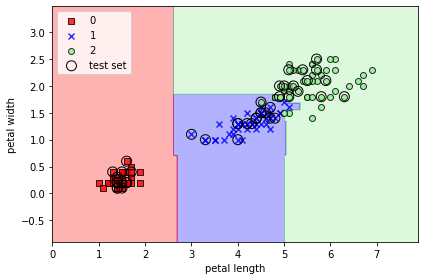

In [62]:
plot_decision_regions(X_combined, y_combined,
classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

##3.7 k-최근접 이웃: 게으른 학습 알고리즘

k-최근접 이웃(K-Nearest Neighbor, KNN) 알고리즘은 훈련 데이터에서 판별 함수(discriminative function)를 학습하는 대신 훈련 데이터셋을 메모리에 저장하기 때문에 게으른 학습기로 표현한다.

모수 모델(parametric model) : 훈련 데이터셋에서 모델 파리미터를 추정한다. 훈련이 끝나면 원본 훈련 데이터셋은 더 이상 필요 없다. 퍼셉트론, 로지스틱 회귀, 선형 SVM

비모수 모델(nonparametric model) : 고정된 개수의 파라미터로 설명될 수 없다. 훈련 데이터가 늘어남에 따라 파라미터 개수도 늘어난다. 결정 트리, 랜덤 포레스트, 커널 SVM

KNN은 비모수 모델이다. 인스턴스 기반 모델이라고도 한다. 훈련 데이터셋을 메모리에 저장하는 것이 특징이다. 인스턴스 기반학습의 특별한 경우가 게으른 학습이며 학습 과정에 비용이 전혀 들지 않는다.

KNN 알고리즘 단계 :

1. 숫자 k와 거리 측정 기준을 선택한다.

2. 분류하려는 샘플에서 k개의 최근접 이웃을 찾는다.

3. 다수결 투표를 통해 클래스 레이블을 할당한다.

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2,
                           metric = 'minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


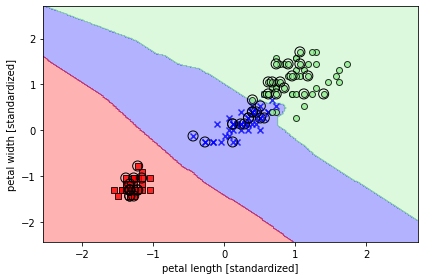

In [64]:
plot_decision_regions(X_combined_std, y_combined,
classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.tight_layout()
plt.show()

KNN은 차원의 저주 때문에 과대적합되기 쉽다는 것이 중요하다.

차원의 저주는 고정된 크기의 훈련 데이터셋이 차원이 늘어남에 따라 특성 공간이 점점 희소해지는 현상이다.

고차원 공간에서는 가장 가까운 이웃이라도 좋은 추정 값을 만들기에는 너무 멀리 떨어져 있다는 뜻이다.

결정 트리나 KNN처럼 규제를 적용할 수 없는 모델에서는 특성 선택과 차원 축소 기법을 사용하면 차원의 저주를 피하는데 도움이 된다.

##3.8 요약

모델 해석이 중요할 때 : 결정 트리

로지스틱 회귀는 확률적 경사 하강법을 사용한 온라인 학습과 특정 이번트 확률을 예측하는 것에도 사용한다.

서포트 벡터 머신은 강력한 선형 모델이면서, 커널 트릭을 사용하여 비선형 문제에도 확장할 수 있다. 단, 튜닝할 하이퍼파라미터가 많다.

랜덤 포레스트 같은 앙상블 모델은 매개변수 튜닝이 많이 필요하지 않고 결정 트리만큼 쉽게 과대적합 되지 않는다.

KNN 분류기는 게으른 학습을 통한 다른 종류의 분류 방식을 사용한다. 모델 훈련 없이 예측을 만들지만 예측 단계의 계산 비용이 높다.